Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [2]:
insurance_data = pd.read_csv('/content/insurance.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance_data.shape

(1338, 7)

In [6]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Categorical Features:


*   sex
*   smoker
*   region


    





<ipython-input-7-6e956f9a3890>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


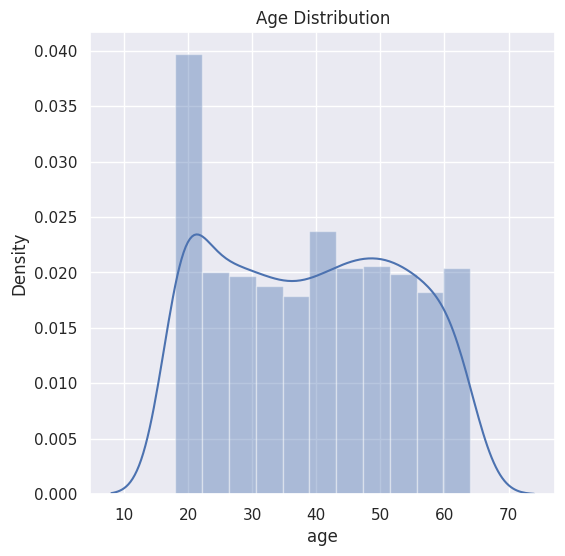

In [7]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

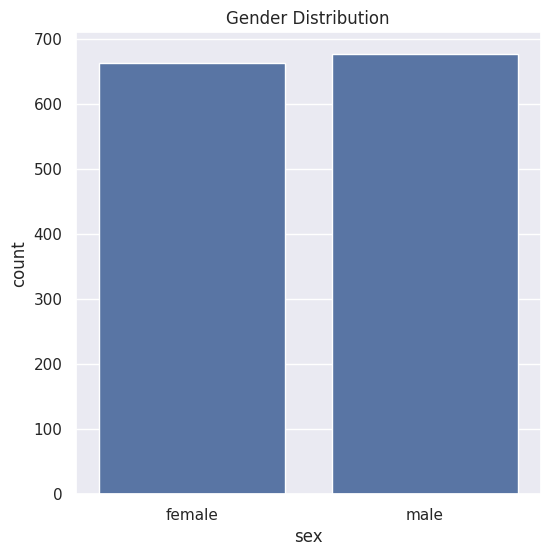

In [8]:
#gender
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_data)
plt.title('Gender Distribution')
plt.show()

In [9]:
insurance_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<ipython-input-10-dd205aa66f0b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


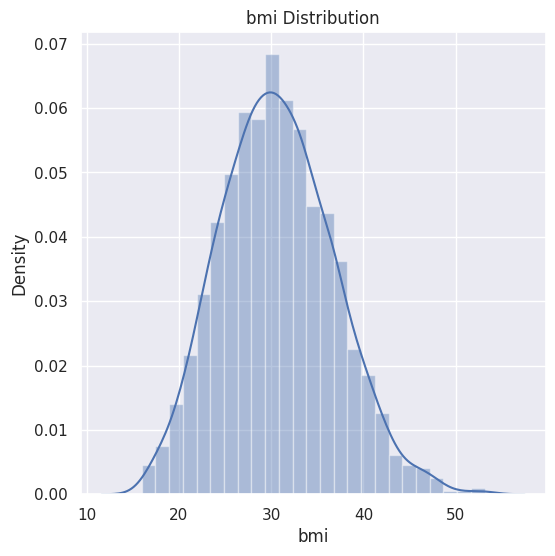

In [10]:
#distribution of bmi value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title('bmi Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

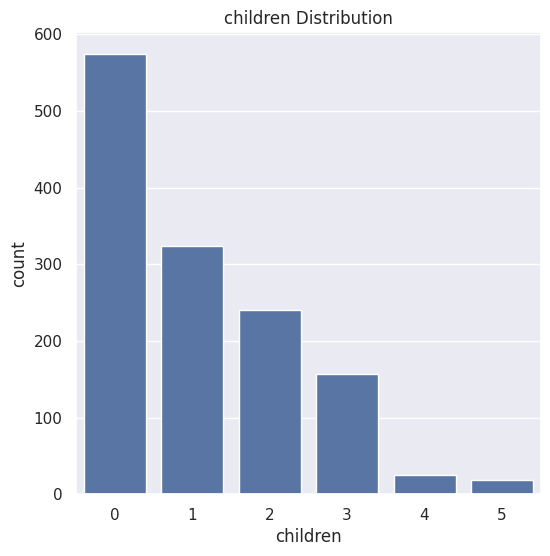

In [11]:
#gender
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_data)
plt.title('children Distribution')
plt.show()

In [12]:
insurance_data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

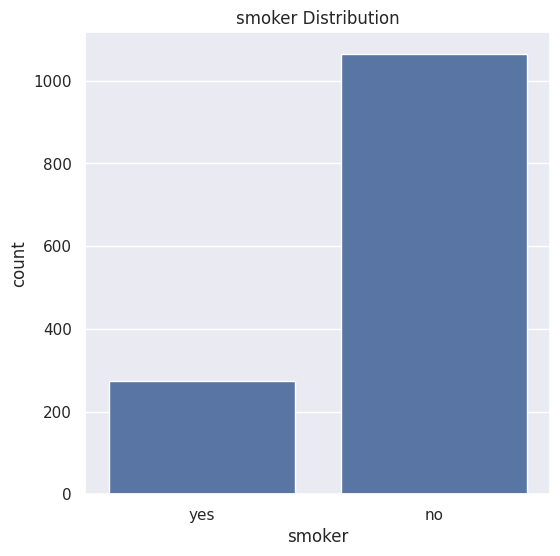

In [13]:
#gender
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_data)
plt.title('smoker Distribution')
plt.show()

In [14]:
insurance_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

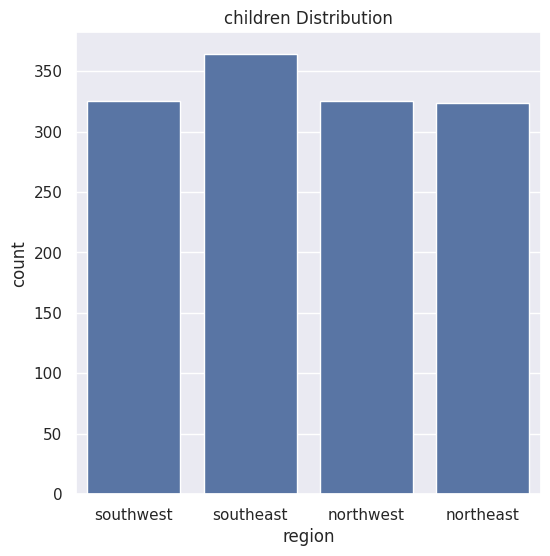

In [15]:
#gender
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_data)
plt.title('children Distribution')
plt.show()

In [16]:
insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<ipython-input-17-04b43cb8d6ed>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


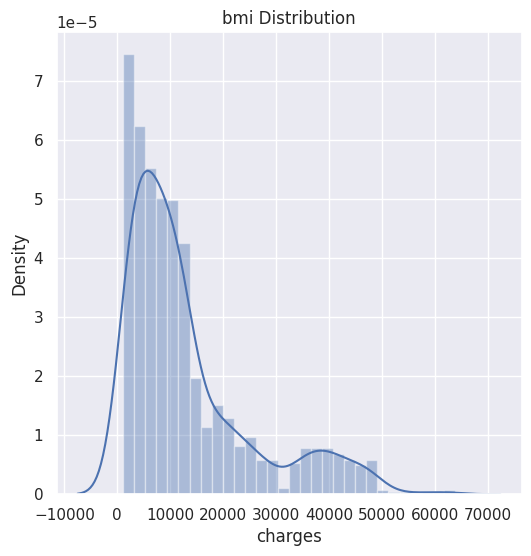

In [17]:
#distribution of bmi value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title('bmi Distribution')
plt.show()

In [18]:
# Label Encoding

In [19]:
insurance_data = insurance_data.replace({'sex':{'male':0,'female':1},'smoker':{'yes':0,'no':1},'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}})

In [20]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [33]:
correlation = insurance_data.corr()

<Axes: >

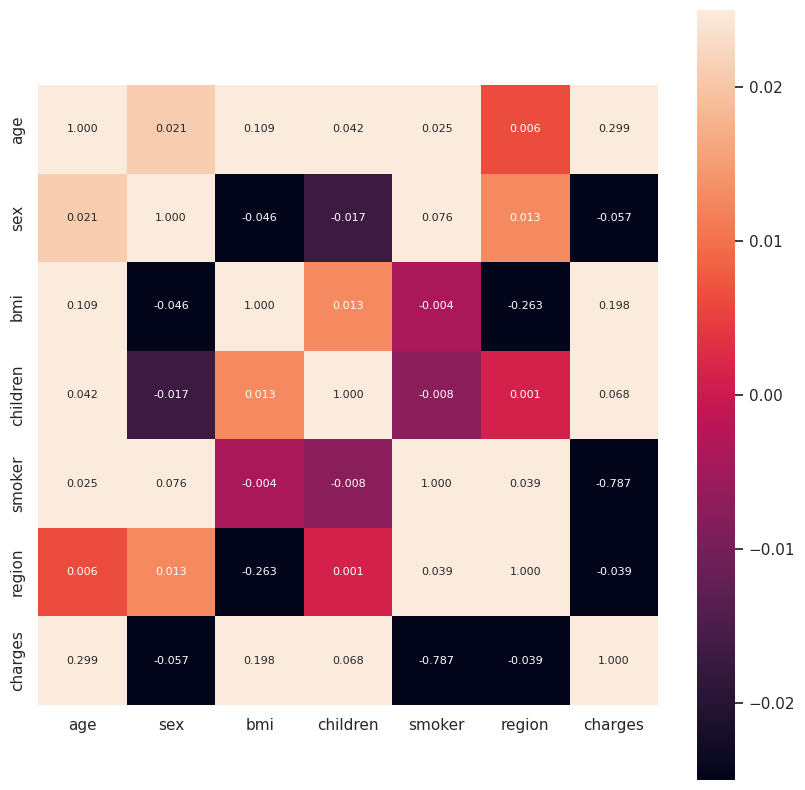

In [34]:
# constructing a heat map to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,vmin=-0.025 , vmax=0.025,cbar=True,square=True,annot=True,fmt='.3f', annot_kws={'size':8})

In [21]:
X = insurance_data.drop(columns='charges',axis=1)
Y = insurance_data['charges']

In [22]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into training data and testing data

In [23]:
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [24]:
print(X_train.shape , X_test.shape , X.shape)

(1070, 6) (268, 6) (1338, 6)


Model Training

In [25]:
regressor = LinearRegression()

In [26]:
regressor.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [27]:
training_data_prediction = regressor.predict(X_train)

<ipython-input-28-9ec21f04196e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(training_data_prediction)


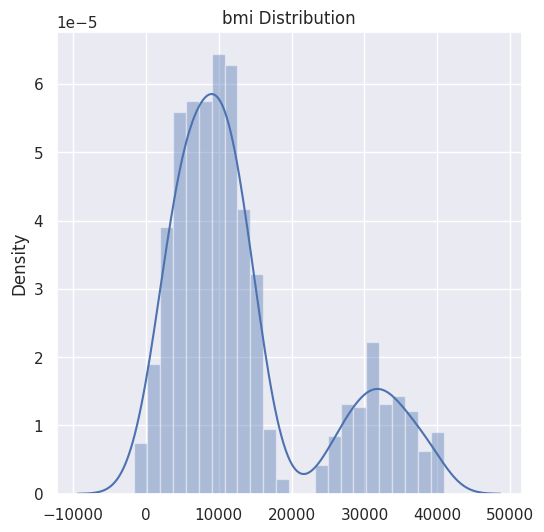

In [28]:
#distribution of bmi value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(training_data_prediction)
plt.title('bmi Distribution')
plt.show()

In [29]:
r2_train = metrics.r2_score(Y_train , training_data_prediction)

In [30]:
print("R squared value:", r2_train)

R squared value: 0.7518195459072954


In [31]:
testing_data_prediction = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test , testing_data_prediction)
print("R squared value:", r2_test)

R squared value: 0.7454471618659976


Buliding the predictive system

In [32]:
input_data = (43,0,27.36,3,1,3)
#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The cost of insurance in USD is' , prediction[0])

[9769.11139696]
The cost of insurance in USD is 9769.111396964685


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Actual vs Predicted

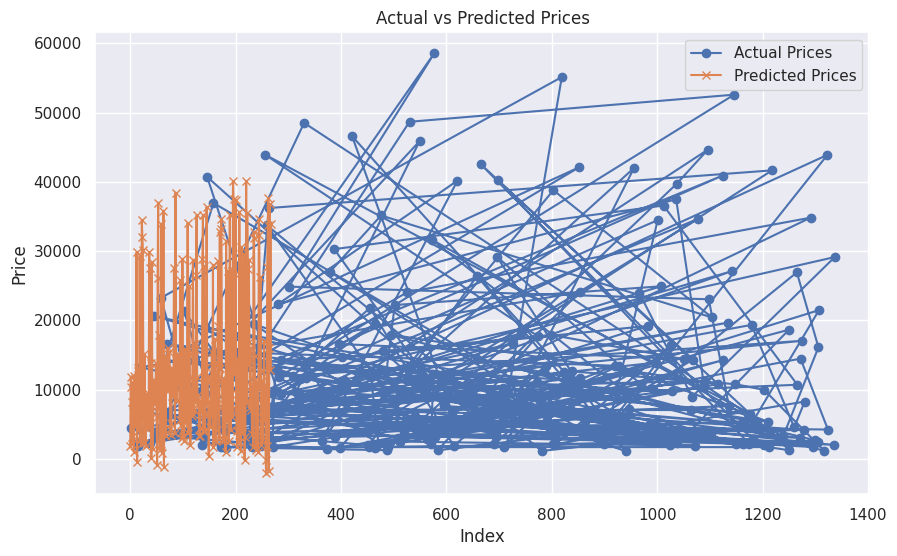

In [36]:
import matplotlib.pyplot as plt

# Example data
actual_prices = Y_test
predicted_prices = testing_data_prediction

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Prices', marker='o')
plt.plot(predicted_prices, label='Predicted Prices', marker='x')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()

# Display the plot
plt.show()


In [42]:

testing_data_prediction_list = testing_data_prediction.tolist()
type(testing_data_prediction_list)

list

In [44]:
Y_test_list = Y_test.tolist()
type(Y_test_list)

list

In [46]:
Y_test_list.sort()

In [47]:
print(Y_test_list)

[1121.8739, 1146.7966, 1163.4627, 1241.565, 1242.816, 1253.936, 1391.5287, 1631.6683, 1631.8212, 1632.03625, 1694.7964, 1702.4553, 1708.92575, 1719.4363, 1727.54, 1727.785, 1748.774, 1769.53165, 1832.094, 1837.237, 1880.07, 1909.52745, 1964.78, 1969.614, 2007.945, 2020.177, 2045.68525, 2055.3249, 2103.08, 2104.1134, 2117.33885, 2136.88225, 2154.361, 2196.4732, 2200.83085, 2203.47185, 2203.73595, 2219.4451, 2250.8352, 2302.3, 2395.17155, 2464.6188, 2498.4144, 2597.779, 2689.4954, 2710.82855, 2801.2588, 2850.68375, 3021.80915, 3044.2133, 3176.8159, 3201.24515, 3206.49135, 3238.4357, 3268.84665, 3353.4703, 3392.3652, 3393.35635, 3471.4096, 3490.5491, 3537.703, 3556.9223, 3577.999, 3645.0894, 3736.4647, 3847.674, 3857.75925, 3956.07145, 3972.9247, 4005.4225, 4032.2407, 4149.736, 4189.1131, 4239.89265, 4266.1658, 4433.9159, 4449.462, 4500.33925, 4504.6624, 4544.2348, 4564.19145, 4766.022, 4827.90495, 4915.05985, 4931.647, 5124.1887, 5138.2567, 5327.40025, 5373.36425, 5375.038, 5397.6167, 54

In [48]:
testing_data_prediction_list.sort()

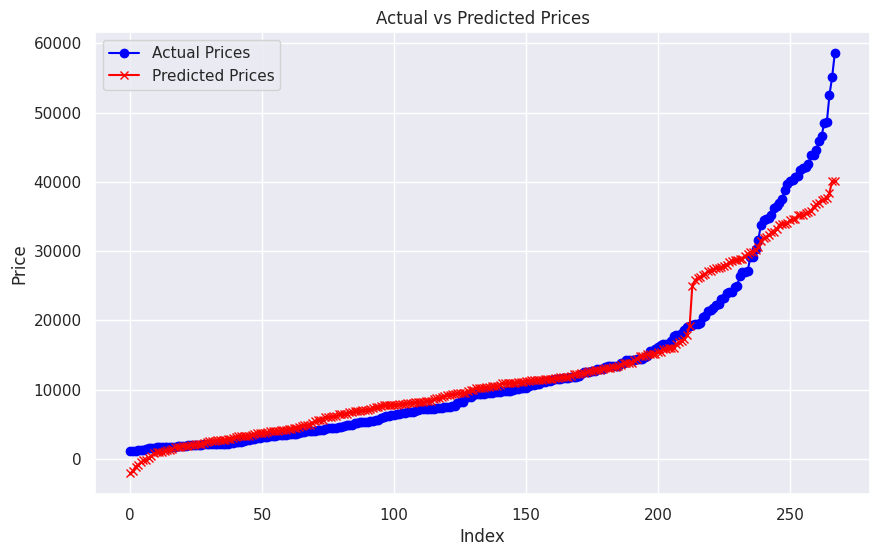

In [49]:
import matplotlib.pyplot as plt

# Example data
actual_prices = Y_test_list
predicted_prices = testing_data_prediction_list

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Prices', marker='o', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', marker='x', color='red')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()

# Display the plot
plt.show()


In [50]:
import pickle
filename = "medical_insurance_cost_prediction_model.sav"
pickle.dump(regressor , open(filename,'wb'))


In [51]:
#loading. the saved model
loaded_model = pickle.load(open('medical_insurance_cost_prediction_model.sav','rb'))

In [52]:
input_data = (43,0,27.36,3,1,3)
#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

print('The cost of insurance in USD is' , prediction[0])

[9769.11139696]
The cost of insurance in USD is 9769.111396964685


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
